In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('data_daily.csv')
df.head()

,# Date,Receipt_Count
0,2021-01-01,7564766
1,2021-01-02,7455524
2,2021-01-03,7095414
3,2021-01-04,7666163
4,2021-01-05,7771289


In [4]:
df.rename(columns = {'# Date':'ds', 'Receipt_Count' : 'y'}, inplace = True)

In [5]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2dyq8vv/4ux8kt7l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2dyq8vv/zwucqu_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9665', 'data', 'file=/tmp/tmpa2dyq8vv/4ux8kt7l.json', 'init=/tmp/tmpa2dyq8vv/zwucqu_z.json', 'output', 'file=/tmp/tmpa2dyq8vv/prophet_model8zsbv2zy/prophet_model-20230204192358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:23:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:23:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
725,2022-12-27
726,2022-12-28
727,2022-12-29
728,2022-12-30
729,2022-12-31


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
725,2022-12-27,1.273092e+07,1.245374e+07,1.300374e+07
726,2022-12-28,1.277657e+07,1.248762e+07,1.306350e+07
727,2022-12-29,1.277794e+07,1.250872e+07,1.306829e+07
728,2022-12-30,1.279033e+07,1.251475e+07,1.304371e+07
729,2022-12-31,1.282942e+07,1.256138e+07,1.311032e+07


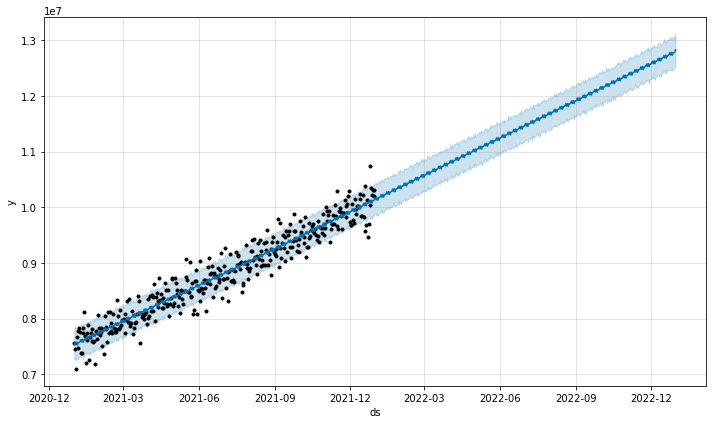

In [8]:
fig1 = m.plot(forecast)


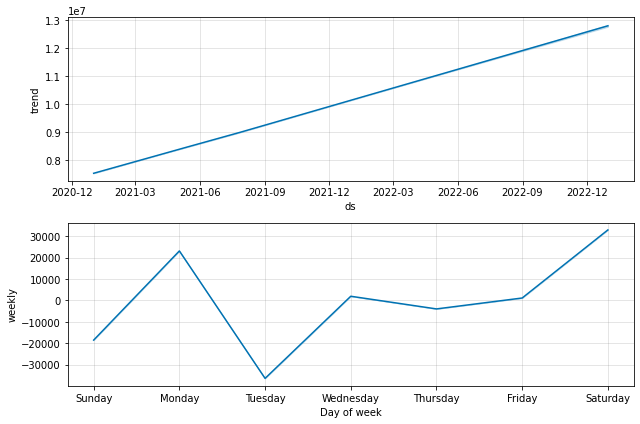

In [9]:
fig2 = m.plot_components(forecast)

In [10]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [11]:
plot_components_plotly(m, forecast)
